In [132]:
import pandas as pd
import psycopg2 as psycopg
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
print('packages ready to go')

packages ready to go


In [133]:
conn = psycopg.connect(
    host = 'prd.redshift-sbg.a.intuit.com',
    database = 'prodredshift',
    user = 'headless_sbseg_us_marketing',
    password = 'ask_for_password',
    port = 5439
    
)
             
             
print('connection to Redshift secured')

connection to Redshift secured


In [134]:
sql = '''
select * from ext_sbg_sandbox_marketing.fy20_rf_email_activity_prod
limit 1000000
;'''

In [135]:
cur = conn.cursor()
#cur.execute('select * from ext_sbg_sandbox_marketing.fy20_rf_email_activity_prod')
df = pd.read_sql_query(sql, conn)

In [6]:
#df

#not needed for overall analysis

,encrypted_master_email,asset_name,campaign_id,campaign_name,campaign_type,campaign_status,cmc,product,region,deployment_id,...,prior_30_day_opens,prior_7_day_opens,clicks,user_prior_click_date,prior_30_day_clicks,prior_7_day_clicks,unsubs,user_prior_unsub_date,prior_30_day_unsubs,prior_7_day_unsubs
0,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,44440-CMC-US-SBG-MLTI_OTH-FLASH:FY20BlackFrida...,9356,44440-CMC-US-SBG-MLTI_OTH-FLASH:FY20BlackFrida...,Promotion,Completed,44440,SBG-Other,US,17330881,...,0,0,0,NaT,0,0,0,None,0,0
1,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,44772-CMC-US-SBG-QBO-ENGMT-productfeaturesNOV_...,8146,44772-CMC-US-SBG-QBO-ENGMT:Nov19MonthlyFeatures,Digest,Draft,44772,SBG-Payments Online,US,16740559,...,1,0,0,NaT,0,0,0,None,0,0
2,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,45086-CMC-US-SBG-QBO_QBC-XSLL:NewsletterOctReg...,8748,45086-CMC-US-SBG-QBO_QBC-XSLL:NewsletterOct,Education,Completed,45086,SBG-QB Capital,US,15803843,...,0,0,0,NaT,0,0,0,None,0,0
3,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,45312-CMC-US-SBG-QBOAV_OTH-UPSL:Propensity_Rep...,8944,45312-CMC-US-SBG-QBOAV_OTH-UPSL:Propensity_Nov,Upsell,Completed,45312,SBG-QBO Advanced,US,17075491,...,1,0,0,NaT,0,0,0,None,0,0
4,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,45709-CMC-US-SBG-QBO-ENGMT-productfeaturesJAN,9860,45709-CMC-US-SBG-QBO-ENGMT:Jan20MonthlyFeatures,Digest,Completed,45709,SBG-Payments Online,US,18683258,...,0,0,0,NaT,0,0,0,None,0,0
5,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,46262-CMC-US-SBG-QBO_QBC-XSLL:DL_February_EM4R...,10335,46100-CMC-US-SBG-QBO_QBC-XSLL:DL_February_EM3,XSell/Attach,Completed,46262,SBG-QB Capital,US,21035715,...,0,0,0,NaT,0,0,0,None,0,0
6,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,46664-CMC-US-SBG-QBO_OTH-UPSL:QBOAV Monthly Up...,11715,46664-CMC-US-SBG-QBO_OTH-UPSL:QBOAV Monthly Up...,Upsell,Completed,46664,SBG-QBO Advanced,US,26779944,...,1,0,0,2020-04-22 19:08:01,0,0,0,None,0,0
7,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,46952-CMC-US-SBG-QBO-ENGMT-productfeaturesJUN_...,11443,46952-CMC-US-SBG-QBO-ENGMT:June20MonthlyFeatures,Digest,Completed,46952,SBG-Payments Online,US,25333746,...,1,0,0,2020-04-22 19:08:01,0,0,0,None,0,0
8,KEY_IDPS_EBSMA^2gEAAAABDItWGmtBWdhRUzzgmSeK/24...,47044-CMC-US-SBG-QBO-PMTS:QBCash-Envelopes-Rem...,11606,47044-CMC-US-SBG-QBO-PMTS:QB_Cash-Envelopes-Te...,Promotion,Completed,47044,SBG-Payments Online,US,26222894,...,2,0,0,2020-04-22 19:08:01,0,0,0,None,0,0
9,KEY_IDPS_EBSMA^2gEAAAABDIug2o8YdusUqJMyF7gQzRa...,44311-CMC-US-SBG-QBDT_TAX-REPEAT:Tax_Retention...,8768,44311 FY20 Tax Forms In-Season EM,Repeat Purchase,Completed,44311,SBG-Supplies,US,15976300,...,4,2,0,NaT,0,0,0,None,0,0


In [12]:
#df.columns
#recency = last_known_tracking?
#frequency = count of send date? clicks? opens? 
#monetary = clicks? opens? 
    #potential negative metric = unsub? 
    
#not needed for overall analysis

Index(['encrypted_master_email', 'asset_name', 'campaign_id', 'campaign_name',
       'campaign_type', 'campaign_status', 'cmc', 'product', 'region',
       'deployment_id', 'last_known_tracking', 'send_date', 'sends',
       'user_prior_send_date', 'days_since_prior_send', 'prior_30_day_sends',
       'prior_7_day_sends', 'opens', 'user_prior_open_date',
       'prior_30_day_opens', 'prior_7_day_opens', 'clicks',
       'user_prior_click_date', 'prior_30_day_clicks', 'prior_7_day_clicks',
       'unsubs', 'user_prior_unsub_date', 'prior_30_day_unsubs',
       'prior_7_day_unsubs'],
      dtype='object')

In [118]:
snapshot_date = df['user_prior_send_date'].max() + timedelta(days=1)
print(snapshot_date)

2020-08-01 20:44:46


In [119]:
#df['user_prior_send_date'].isna().sum()

#would be interesting to see how we are engaging with them vs how they engaged with us
    #user_prior_open_date would be a solid way of showing they engage with us
#worth looking at what month people received email communication
    #regression would be neat ~super open ended~
    
    
#not needed for overall analysis    

155

In [120]:
data_process = df.groupby(['encrypted_master_email']).agg({
        'user_prior_send_date': lambda x: (snapshot_date - x.max()).days,
        'encrypted_master_email': 'count',
        'opens': 'sum'})

In [30]:
#data_process

#not needed for overall analysis

,user_prior_send_date,encrypted_master_email,opens
encrypted_master_email,,,
KEY_IDPS_EBSMA^2gEAAAABxFmhOWGO3m0Ea49vVfsqvYegFtM6EmNBQrXGYvBK3IR5IRh+Gl+9,35.0,2,2
KEY_IDPS_EBSMA^2gEAAAABxIA+UBvV7ugFUAqRrOgbtxT1Yrl5U/+GROfkdRmFuMEHlCllEjI=,6.0,7,6
KEY_IDPS_EBSMA^2gEAAAABxIAHBcFRHKYrgOEJnqd/CWnl42zhTXQenudmz0XpWsIV+3SdOiigss7wlA09nax5,77.0,10,3
KEY_IDPS_EBSMA^2gEAAAABxIAPjOglmYzlZ/GU8yZ9rsi5Z+MKpUtta4OreT7+xvSL,4.0,6,0
KEY_IDPS_EBSMA^2gEAAAABxIAV42wVOeE6a5UO/Kx1y9H8dnIwVJNtClCIapdm3I8pPO2aD+UHOaYlK+YEhw==,279.0,2,1
...,...,...,...
KEY_IDPS_EBSMA^2gEAAAABxIXzlsTKld0SekjVOggbg7JJQlYUeqz8OyNCnl6G8FBxqhPg8X4=,7.0,14,0
KEY_IDPS_EBSMA^2gEAAAABxIY3Sy38Bi6HqsPDeM3B6h8Qi8MahxoZie45xgkxEye8,63.0,10,0
KEY_IDPS_EBSMA^2gEAAAABxIYN0izMROpHBQ0jxoMTDxU1QrrtZMtXEtB2eQn4nD8wYtGO7cyaTbo=,27.0,4,0


In [121]:
data_process.rename(columns={'user_prior_send_date': 'Recency',
                         'encrypted_master_email': 'Frequency',
                         'opens': 'MonetaryValue'}, inplace=True)

/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

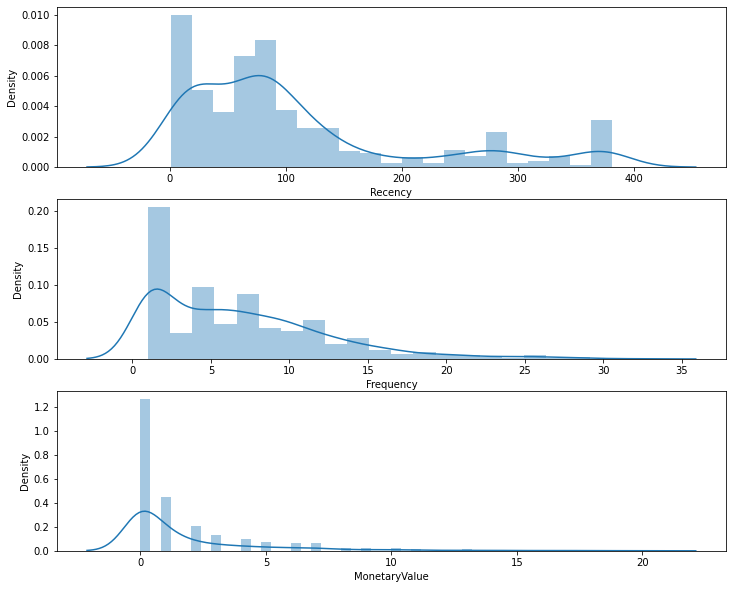

In [122]:
# Plot RFM distributions
#plt.figure(figsize=(12,10))
# Plot distribution of R
#plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
#plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
#plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
#plt.show()

#not needed for overall analysis

In [123]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
encrypted_master_email,,,,,
KEY_IDPS_EBSMA^2gEAAAAB+++OavA4wJtQHDJFr/wYHfoa3ZCzEAw3zNVHnqlBYJkEdCAJ,104.0,4,4,2,2
KEY_IDPS_EBSMA^2gEAAAAB+++RTrtspszUed+GAdoG/kbHCQsIhVvoiNNjyOpeoqVdSe/54O9tDfHrdg==,95.0,9,5,2,3
KEY_IDPS_EBSMA^2gEAAAAB+++Sn00LGjPZO3IXwZqEBdNNL2WN5HQBZxi4zDIb0odmP0naHg0=,95.0,4,2,2,2
KEY_IDPS_EBSMA^2gEAAAAB+++ccNMfMP9OcztJiZPAq1dw7GBdMRDx8hWV95vtuXf5hvCp,24.0,6,0,4,2
KEY_IDPS_EBSMA^2gEAAAAB+++m6FmK46wIXdRY34UA/goZKbzwq2wG4kcbTBwcbDLGT64ra/VAyQmHThQ=,24.0,3,1,4,2


In [124]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['Frequency'], q=4, labels=m_labels, duplicates = 'drop')
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [131]:
m_groups.unique()

[2, 3, 4, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [125]:
#def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
#data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
#rfm = data_process
#rfm.head()

#not needed for overall analysis

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
encrypted_master_email,,,,,,,
KEY_IDPS_EBSMA^2gEAAAAB+++OavA4wJtQHDJFr/wYHfoa3ZCzEAw3zNVHnqlBYJkEdCAJ,104.0,4,4,2,2,2,2.022
KEY_IDPS_EBSMA^2gEAAAAB+++RTrtspszUed+GAdoG/kbHCQsIhVvoiNNjyOpeoqVdSe/54O9tDfHrdg==,95.0,9,5,2,3,3,2.033
KEY_IDPS_EBSMA^2gEAAAAB+++Sn00LGjPZO3IXwZqEBdNNL2WN5HQBZxi4zDIb0odmP0naHg0=,95.0,4,2,2,2,2,2.022
KEY_IDPS_EBSMA^2gEAAAAB+++ccNMfMP9OcztJiZPAq1dw7GBdMRDx8hWV95vtuXf5hvCp,24.0,6,0,4,2,2,4.022
KEY_IDPS_EBSMA^2gEAAAAB+++m6FmK46wIXdRY34UA/goZKbzwq2wG4kcbTBwcbDLGT64ra/VAyQmHThQ=,24.0,3,1,4,2,2,4.022


In [126]:
#unsure why it added a decimal point but the customer segments are still valid

#data_process['RFM_Segment_Concat'].unique()

#not needed for overall analysis

array(['2.022', '2.033', '4.022', '4.044', 'nan11', '3.044', '3.033',
       '3.022', '2.044', '4.033', '1.011', '1.022', '2.011', '4.011',
       '3.011', '1.033', '1.044'], dtype=object)

In [127]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
#print(rfm['RFM_Score'].head())

encrypted_master_email
KEY_IDPS_EBSMA^2gEAAAAB+++OavA4wJtQHDJFr/wYHfoa3ZCzEAw3zNVHnqlBYJkEdCAJ                6.0
KEY_IDPS_EBSMA^2gEAAAAB+++RTrtspszUed+GAdoG/kbHCQsIhVvoiNNjyOpeoqVdSe/54O9tDfHrdg==    8.0
KEY_IDPS_EBSMA^2gEAAAAB+++Sn00LGjPZO3IXwZqEBdNNL2WN5HQBZxi4zDIb0odmP0naHg0=            6.0
KEY_IDPS_EBSMA^2gEAAAAB+++ccNMfMP9OcztJiZPAq1dw7GBdMRDx8hWV95vtuXf5hvCp                8.0
KEY_IDPS_EBSMA^2gEAAAAB+++m6FmK46wIXdRY34UA/goZKbzwq2wG4kcbTBwcbDLGT64ra/VAyQmHThQ=    8.0
Name: RFM_Score, dtype: float64


In [128]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
encrypted_master_email,,,,,,,,,
KEY_IDPS_EBSMA^2gEAAAAB+++OavA4wJtQHDJFr/wYHfoa3ZCzEAw3zNVHnqlBYJkEdCAJ,104.0,4,4,2,2,2,2.022,6.0,Potential
KEY_IDPS_EBSMA^2gEAAAAB+++RTrtspszUed+GAdoG/kbHCQsIhVvoiNNjyOpeoqVdSe/54O9tDfHrdg==,95.0,9,5,2,3,3,2.033,8.0,Champions
KEY_IDPS_EBSMA^2gEAAAAB+++Sn00LGjPZO3IXwZqEBdNNL2WN5HQBZxi4zDIb0odmP0naHg0=,95.0,4,2,2,2,2,2.022,6.0,Potential
KEY_IDPS_EBSMA^2gEAAAAB+++ccNMfMP9OcztJiZPAq1dw7GBdMRDx8hWV95vtuXf5hvCp,24.0,6,0,4,2,2,4.022,8.0,Champions
KEY_IDPS_EBSMA^2gEAAAAB+++m6FmK46wIXdRY34UA/goZKbzwq2wG4kcbTBwcbDLGT64ra/VAyQmHThQ=,24.0,3,1,4,2,2,4.022,8.0,Champions


In [129]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      41.9      12.3           3.4   560
Champions             66.6       6.9           1.7   146
Loyal                 79.4       5.2           1.2   131
Needs Attention      109.2       1.6           0.4    63
Potential            101.7       4.5           1.0   141
Promising            176.5       3.4           0.8    81
Require Activation   298.8       1.2           0.3   336


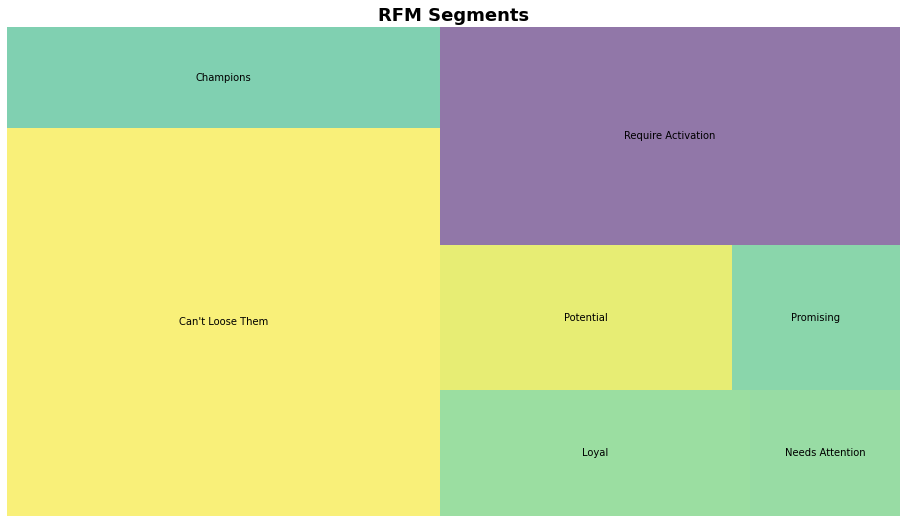

In [130]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()